In [1]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#data['강수량'] = data['강수량'].fillna(0) #강수량이 Null인 값을 0으로 치환

In [4]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/24_Problemsolver_TP.csv', encoding='cp949')

In [5]:
data_cleaned = data.dropna() # Nan값 (결측치) 제거

In [6]:
data.columns

Index(['지역', '일자', '강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '평균기온',
       '최저기온', '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속',
       '최대순간풍석풍향', '미세먼지 농도'],
      dtype='object')

In [7]:
data_cleaned #결측치 제거 확인

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0


In [9]:
# 4개의 칼럼에 존재하는 이상치 제거

data_cleaned = data_cleaned[(data_cleaned['미세먼지 농도'] >= 0) & (data_cleaned['미세먼지 농도'] <= 500)]
data_cleaned = data_cleaned[(data_cleaned['이산화질소'] >= 0) & (data_cleaned['이산화질소'] <= 1000)]
data_cleaned = data_cleaned[(data_cleaned['아황산가스'] >= 0) & (data_cleaned['아황산가스'] <= 1000)]
data_cleaned = data_cleaned[(data_cleaned['일산화질소'] >= 0) & (data_cleaned['일산화질소'] <= 1000)]

In [10]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0


In [11]:
from datetime import datetime
data_cleaned['year'] = data_cleaned['일자'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
data_cleaned['month'] = data_cleaned['일자'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
data_cleaned['month'] = data_cleaned['month'].astype(str).str.zfill(2)

In [12]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0,2019,09
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0,2019,09
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0,2019,09
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0,2019,10
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,2023,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,2023,12
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,2023,12
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,2023,12


In [13]:
# '지역' 값을 숫자로 매핑하기 위한 딕셔너리 생성
region_mapping = {
    '강릉시': 1,
    '동해시': 2,
    '속초시': 3,
    '영월군': 4,
    '원주시': 5,
    '인제군': 6,
    '정선군': 7,
    '철원군': 8,
    '춘천시': 9,
    '태백시': 10,
    '홍천군': 11,
}

# 'adr' 열 생성 및 '지역' 값을 숫자로 변환하여 채우기
data_cleaned['adr'] = data_cleaned['지역'].map(region_mapping)

data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,...,평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month,adr
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,...,22.9,1.1,2.5,230.0,4.3,270.0,23.0,2019,09,1
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,...,19.4,1.3,3.9,140.0,6.8,160.0,19.0,2019,09,1
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,...,17.7,1.9,4.6,90.0,10.1,340.0,19.0,2019,09,1
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,...,22.3,1.0,3.1,90.0,7.0,20.0,37.0,2019,10,1
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,...,5.9,1.9,4.6,230.0,7.6,230.0,27.0,2019,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,...,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,2023,11,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,...,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,2023,12,11
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,...,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,2023,12,11
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,...,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,2023,12,11


In [ ]:
#======================================================================================= LSTM

In [14]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,...,평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month,adr
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,...,22.9,1.1,2.5,230.0,4.3,270.0,23.0,2019,09,1
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,...,19.4,1.3,3.9,140.0,6.8,160.0,19.0,2019,09,1
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,...,17.7,1.9,4.6,90.0,10.1,340.0,19.0,2019,09,1
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,...,22.3,1.0,3.1,90.0,7.0,20.0,37.0,2019,10,1
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,...,5.9,1.9,4.6,230.0,7.6,230.0,27.0,2019,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,...,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,2023,11,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,...,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,2023,12,11
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,...,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,2023,12,11
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,...,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,2023,12,11


In [15]:
data_cleaned['time'] = data_cleaned['year'].astype(str)+ data_cleaned['month'].astype(str)

LSTM 돌리기

In [16]:
data_cleaned = data_cleaned.sort_values(by=['일자'], ascending=True)

In [17]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,...,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month,adr,time
11258,태백시,2019-01-01,0.0,4.3,941.4,0.000,0.007,0.0,-7.1,-11.4,...,1.6,3.9,360.0,9.6,340.0,0.0,2019,01,10,201901
13257,정선군,2019-01-01,0.0,3.1,993.2,0.002,0.021,0.6,-6.6,-12.8,...,2.4,9.3,20.0,11.8,50.0,36.0,2019,01,7,201901
14650,강릉시,2019-01-01,0.0,2.3,1025.7,0.002,0.016,0.3,-0.7,-2.7,...,4.1,6.2,230.0,11.5,250.0,21.0,2019,01,1,201901
12372,철원군,2019-01-01,0.0,3.6,1013.8,0.004,0.009,0.6,-9.2,-16.5,...,1.0,3.6,200.0,6.5,230.0,37.0,2019,01,8,201901
14447,동해시,2019-01-01,0.0,2.4,1023.5,0.002,0.016,0.3,0.0,-3.2,...,2.0,4.9,320.0,8.8,340.0,19.0,2019,01,2,201901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,속초시,2023-12-31,26.8,9.0,1015.5,0.003,0.008,0.4,1.6,0.2,...,1.9,4.5,20.0,9.6,320.0,18.0,2023,12,3,202312
9883,태백시,2023-12-31,2.5,5.0,940.6,0.002,0.010,0.7,0.3,-1.7,...,1.3,4.1,20.0,7.1,360.0,20.0,2023,12,10,202312
9196,홍천군,2023-12-31,4.9,5.4,1001.1,0.003,0.014,0.6,1.2,0.0,...,0.2,1.6,270.0,4.1,270.0,36.0,2023,12,11,202312
855,강릉시,2023-12-31,14.7,9.5,1015.0,0.003,0.011,0.5,3.0,2.1,...,2.2,5.5,320.0,10.5,340.0,11.0,2023,12,1,202312


Epoch 1/60
137/137 [==============================] - 22s 126ms/step - loss: 0.7708 - val_loss: 1.2700
Epoch 2/60
137/137 [==============================] - 17s 123ms/step - loss: 0.7540 - val_loss: 1.2049
Epoch 3/60
137/137 [==============================] - 17s 126ms/step - loss: 0.7552 - val_loss: 0.6264
Epoch 4/60
137/137 [==============================] - 17s 123ms/step - loss: 0.7099 - val_loss: 0.6729
Epoch 5/60
137/137 [==============================] - 17s 123ms/step - loss: 0.7137 - val_loss: 0.7084
Epoch 6/60
137/137 [==============================] - 17s 123ms/step - loss: 0.6929 - val_loss: 0.7511
Epoch 7/60
137/137 [==============================] - 17s 123ms/step - loss: 0.7144 - val_loss: 0.6661
Epoch 8/60
137/137 [==============================] - 17s 123ms/step - loss: 0.6806 - val_loss: 0.6735
Epoch 9/60
137/137 [==============================] - 17s 122ms/step - loss: 0.6836 - val_loss: 0.6929
Epoch 10/60
137/137 [==============================] - 17s 123ms/step - l

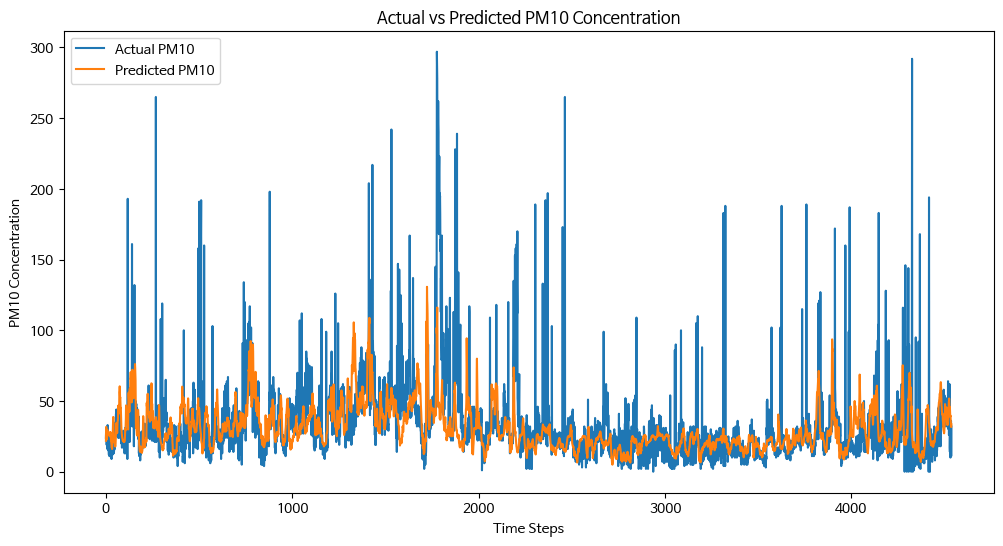

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 데이터 로드 (data_cleaned가 정의되어야 함)
# 예시: data_cleaned = pd.read_csv("path_to_your_data.csv")

# 독립 변수와 종속 변수 선택
df = data_cleaned[['adr', '강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '최저기온', '합계 일조시간(hr)', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속','최대순간풍석풍향','month']]
y = data_cleaned['미세먼지 농도']

# 독립 변수와 종속 변수 각각에 대해 StandardScaler 적용
X_scaler = StandardScaler()  # 독립 변수용 스케일러
y_scaler = StandardScaler()  # 종속 변수용 스케일러

scaled_X = X_scaler.fit_transform(df)  # 독립 변수 스케일링
scaled_y = y_scaler.fit_transform(y.values.reshape(-1, 1))  # 종속 변수 스케일링

# 시퀀스 데이터 생성 함수
def create_sequences(data, target, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # 시퀀스 길이
X, y = create_sequences(scaled_X, scaled_y, seq_length)

# 학습 데이터와 테스트 데이터 분리
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 정의
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, X.shape[2]), dropout=0.2, recurrent_dropout=0.2),
    LSTM(128, dropout=0.3, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=60, batch_size=80, validation_split=0.2, shuffle=False)

# 모델 평가 및 예측
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

y_pred = model.predict(X_test)

# 정규화 복원
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = y_scaler.inverse_transform(y_pred)


# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual PM10')
plt.plot(y_pred_rescaled, label='Predicted PM10')
plt.legend()
plt.title("Actual vs Predicted PM10 Concentration")
plt.xlabel("Time Steps")
plt.ylabel("PM10 Concentration")
plt.show()


In [19]:
# 정규화 복원
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_train_rescaled = y_scaler.inverse_transform(y_train)
y_pred_train_rescaled = y_scaler.inverse_transform(y_pred_train)

y_test_rescaled = y_scaler.inverse_transform(y_test)
y_pred_test_rescaled = y_scaler.inverse_transform(y_pred_test)


426/426 [==============================] - 7s 16ms/step


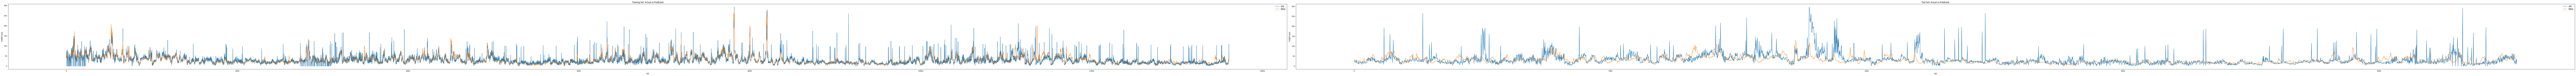

In [20]:
plt.figure(figsize=(200, 6))  # 그림 크기를 적당하게 수정

# 훈련 데이터 시각화
plt.subplot(1, 2, 1)
plt.plot(y_train_rescaled, label='실제')
plt.plot(y_pred_train_rescaled.flatten(), label='예측값')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('시간')
plt.ylabel('미세먼지 농도')
plt.legend()

# 테스트 데이터 시각화
plt.subplot(1, 2, 2)
plt.plot(y_test_rescaled, label='실제')
plt.plot(y_pred_test_rescaled.flatten(), label='예측값')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('시간')
plt.ylabel('미세먼지 농도')
plt.legend()

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


In [21]:
# 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 결과 평가
train_rmse = np.sqrt(np.mean((y_train - y_pred_train.flatten())**2))
test_rmse = np.sqrt(np.mean((y_test - y_pred_test.flatten())**2))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

from sklearn.metrics import mean_absolute_error, r2_score

# 모델 예측
y_pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


142/142 [==============================] - 2s 13ms/step
Train RMSE: 1.2430616806664954
Test RMSE: 1.3523503882962162
142/142 [==============================] - 2s 13ms/step
Mean Absolute Error: 0.6090557507370141
R2 Score: 0.1200250503626551


In [22]:
seq_length = 1

# 새로운 데이터 전처리
new_data = np.array([[2, 0, 0.1, 1023.7, 0.0019, 0.0157, 0.3, 0, 8.2, 2.9, 3.7, 247, 4.2, 292.5, 12]]) #12월 05일 동해의 요소 == 실제 : 20 삼척은 42
#----['adr', '강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '최저기온', '합계 일조시간(hr)', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속','최대순간풍석풍향','month'
# 새 데이터 정규화
new_data_scaled = X_scaler.transform(new_data)

# 시퀀스 데이터 생성
# 예: 이전 29개의 데이터가 없을 경우, 0으로 채움
seq_length = 30
if new_data_scaled.shape[0] < seq_length:
    padding = np.zeros((seq_length - new_data_scaled.shape[0], new_data_scaled.shape[1]))
    new_sequence = np.vstack([padding, new_data_scaled])
else:
    new_sequence = new_data_scaled[-seq_length:]

# 모델 입력 형식으로 변환
new_sequence = new_sequence.reshape(1, seq_length, new_sequence.shape[1])

# 예측
predicted_scaled = model.predict(new_sequence)
predicted_rescaled = y_scaler.inverse_transform(predicted_scaled)

print(f"Predicted PM10 Concentration: {predicted_rescaled[0][0]:.2f}")


1/1 [==============================] - 0s 30ms/step
Predicted PM10 Concentration: 34.91


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


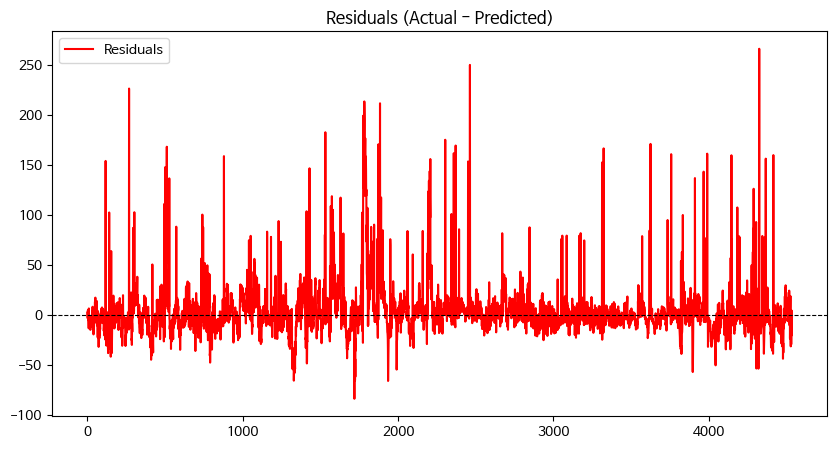

In [23]:
# 잔차 분석 (Residual Plot)
residuals = y_test_rescaled - y_pred_test_rescaled
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals', color='red')
plt.title("Residuals (Actual - Predicted)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()
